<a href="https://colab.research.google.com/github/KhiemCE22/kNN-Model/blob/main/Demo_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

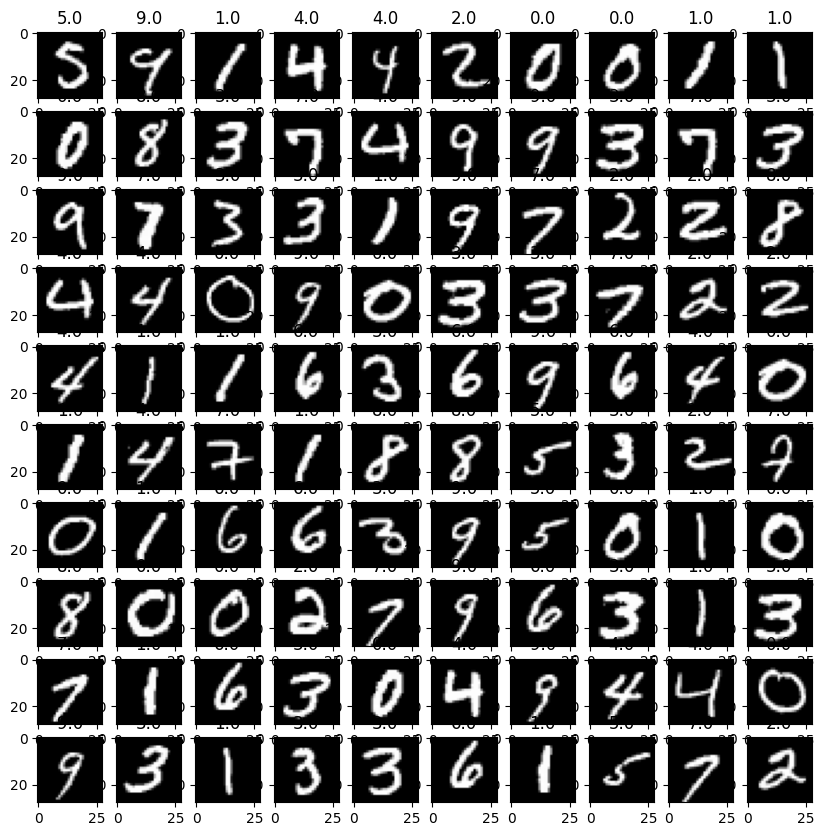

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Tải dữ liệu MNIST
mnist = np.loadtxt("mnist.csv", skiprows=1, delimiter=",")

# Lấy 100 hình ảnh ngẫu nhiên
indices = np.random.randint(0, len(mnist), 100)
images = mnist[indices, 1:]
labels = mnist[indices, 0]

# Hiển thị các hình ảnh
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
for i in range(10):
    for j in range(10):
        axes[i, j].imshow(images[i * 10 + j].reshape(28, 28), cmap="gray")
        axes[i, j].set_title(str(labels[i * 10 + j]))
plt.show()


In [ ]:
import random

def generate_50_random_floats():
  array = []
  for i in range(50):
    number = random.uniform(-100, 100)
    n_digits = random.randint(1, 3)
    number_str = "%.*f" % (n_digits, number)
    array.append(float(number_str))
  return array

print(generate_50_random_floats())


[12.89, 50.116, -22.2, -85.28, -49.846, -63.176, -11.12, -4.68, -59.4, -27.7, -67.09, 35.874, 75.003, -95.3, -76.42, 70.61, 86.361, -90.02, -70.181, 54.6, -63.775, -59.5, 5.991, -65.65, 19.1, -7.4, -58.46, 8.87, 54.361, -52.143, -71.57, 68.095, -22.7, -89.2, 82.81, 13.2, -48.41, -68.2, 89.87, -9.0, -9.115, -45.49, 80.443, 74.398, 20.557, 44.182, 1.642, 83.7, -49.722, 59.7]


In [ ]:
import pandas as pd

data = pd.read_csv("data.csv",header=None)
# Lấy cột đầu tiên làm label
label = data.iloc[:, 0]

# Lấy các cột còn lại làm feature
features = data.iloc[:, 1:]


In [ ]:
# Kích thước của label
label_size = label.shape

# Kích thước của feature
feature_size = features.shape

# In kích thước
print("Kích thước label:", label_size)
print("Kích thước feature:", feature_size)


Kích thước label: (199,)
Kích thước feature: (199, 784)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    features, label, test_size=0.7, shuffle=False)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

    1    2    3    4    5    6    7    8    9    10   ...  775  776  777  778  \
0     0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1     0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2     0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3     0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4     0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
5     0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
6     0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
7     0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
8     0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
9     0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
10    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
11    0    0    0    0    0 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Lựa chọn giá trị k
k = 5

# Khởi tạo mô hình kNN
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred = knn.predict(X_test)
print(y_pred)

[2 9 3 9 4 4 6 4 9 1 0 9 2 7 5 1 5 9 1 4 3 1 3 3 9 1 7 6 2 8 2 1 5 0 7 4 9
 9 8 3]


In [ ]:
from sklearn.neighbors import NearestNeighbors

# Lựa chọn giá trị k
k = 5

# Khởi tạo mô hình NearestNeighbors
nn = NearestNeighbors(n_neighbors=k)
nn.fit(X_train)

# Tìm k phần tử gần nhất với mẫu
distances, indices = nn.kneighbors(X_test)
print(distances)
print(indices)

[[1720.07180083 1912.62202225 2072.96574984 2235.30065092 2244.00222816]
 [1802.94314941 1864.926272   1894.14677362 1896.57164378 1897.3196884 ]
 [1580.7577297  2113.17722872 2140.71646885 2144.40038239 2165.52303151]
 [1497.59473824 1500.85542275 1749.37817524 1793.31926884 1840.46461525]
 [1138.52755786 1583.49613198 1645.79737513 1719.91133492 1769.41289698]
 [1679.29389923 1900.42153219 2266.43618926 2302.69450861 2356.87971691]
 [1228.37331459 1309.40368107 1330.39806073 1452.93117525 1454.73777706]
 [1369.5575928  1525.68017618 1610.43441344 1669.84819669 1686.97777105]
 [1235.90654987 1380.5788641  1462.75732779 1612.08064314 1675.37279434]
 [1606.54940789 1729.4325659  1904.94068149 1942.28216282 1942.76195145]
 [1013.00098717 1316.34455976 1406.00924606 1558.47104561 1596.2314995 ]
 [1162.07013558 1569.12236617 1596.05169089 1596.08896995 1870.13662602]
 [1570.41013751 1940.62876409 1983.9954637  2004.7528526  2259.78804316]
 [1284.05568415 1637.85438913 1783.0011217  1931.12

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print("Độ chính xác:", accuracy)

Độ chính xác: 0.775
